In [2]:
import pandas as pd
import numpy as np
from collections import defaultdict
from matplotlib import pyplot as plt
import random
import os

import torch
import torch.nn as nn
import torch.nn.functional as F

from utils import *

from models import * 
import torch.optim as optim

from sklearn import preprocessing

from Experiments import *

seed = 0 

def set_seeds(seed): 
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed) 

set_seeds(seed)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

%load_ext autoreload
%autoreload 2


cuda


In [132]:
# dataset = 'traffic'
# data_file = "traffic_data/data.csv"
# hier_file = "traffic_data/agg_mat.csv"

# data = pd.read_csv(data_file, index_col=0)
# agg_mat_df = pd.read_csv(hier_file, index_col=0)
# base_agg_mat = agg_mat_df.values

# dataset = 'tourism'
# data_file = "tourism_data/data.csv"
# hier_file = "tourism_data/agg_mat.csv"

dataset = 'labor'
data_file = "labor/data.csv"
hier_file = "labor/agg_mat.csv"

data = pd.read_csv(data_file, index_col=0)
agg_mat_df = pd.read_csv(hier_file, index_col=0)
base_agg_mat = agg_mat_df.values

In [133]:
maximum = np.max(data.values)
data = (data / maximum).values
data.shape

(514, 57)

In [157]:
batch_size = 32
context_window = 5
train_split = 0.8
val_split = 0.1
hidden_dim = 128

num_runs = 1
n_epochs = 1000

In [146]:
# Base model 

params = {'n_series':data.shape[1], 'hidden_size':hidden_dim, 'lr':1e-3, 'n_epochs':n_epochs,
          'batch_size':batch_size, 'train_split':train_split, 'val_split':val_split, 'context_window':context_window, 'aggregate':False,
          'coherency_loss':False,'profhit':False, 'project':False, 'coherency_weight':0}
base_results, names, base_losses = repeat_exp(BaseModel, base_agg_mat, data, params, num_runs)

run 0


100%|██████████| 1000/1000 [00:12<00:00, 81.68it/s]


run 1


100%|██████████| 1000/1000 [00:12<00:00, 82.07it/s]


run 2


100%|██████████| 1000/1000 [00:12<00:00, 82.01it/s]


run 3


100%|██████████| 1000/1000 [00:12<00:00, 82.25it/s]


run 4


100%|██████████| 1000/1000 [00:12<00:00, 82.46it/s]


run 5


100%|██████████| 1000/1000 [00:12<00:00, 83.31it/s]


run 6


100%|██████████| 1000/1000 [00:12<00:00, 82.60it/s]


run 7


100%|██████████| 1000/1000 [00:11<00:00, 83.44it/s]


run 8


100%|██████████| 1000/1000 [00:12<00:00, 82.10it/s]


run 9


100%|██████████| 1000/1000 [00:12<00:00, 82.49it/s]


In [163]:
# Coherency loss

params = {'n_series':data.shape[1], 'hidden_size':hidden_dim, 'lr':1e-3, 'n_epochs':n_epochs, 'batch_size':batch_size, 'train_split':train_split, 'val_split':val_split, 'context_window':context_window, 'aggregate':False,
          'coherency_loss':True, 'profhit':False, 'coherency_weight':1e-4, 'project':False}

coherency_results, names, coherency_losses = repeat_exp(BaseModel, base_agg_mat, data, params, num_runs)

run 0


100%|██████████| 1000/1000 [00:13<00:00, 75.08it/s]


In [169]:
# PROFHiT

params = {'n_series':data.shape[1], 'hidden_size':hidden_dim, 'lr':1e-3, 'n_epochs':n_epochs, 'batch_size':batch_size, 'train_split':train_split, 'val_split':val_split, 'context_window':context_window, 'aggregate':False,
          'coherency_loss':False, 'profhit':True, 'coherency_weight':1e-2, 'project':False}
profhit_results, names, profhit_losses = repeat_exp(BaseModel, base_agg_mat, data, params, num_runs)

run 0


100%|██████████| 1000/1000 [00:12<00:00, 77.69it/s]


In [149]:
# Projection 

params = {'n_series':data.shape[1], 'hidden_size':hidden_dim, 'lr':1e-3, 'n_epochs':n_epochs, 'batch_size':batch_size, 'train_split':train_split, 'val_split':val_split, 'context_window':context_window, 'aggregate':False,
          'coherency_loss':False, 'profhit':False, 'project':True, 'coherency_weight':1}
projection_results, names, projection_losses = repeat_exp(BaseModel, base_agg_mat, data, params, num_runs)

run 0


100%|██████████| 1000/1000 [00:12<00:00, 81.86it/s]


run 1


100%|██████████| 1000/1000 [00:12<00:00, 81.76it/s]


run 2


100%|██████████| 1000/1000 [00:12<00:00, 80.83it/s]


run 3


100%|██████████| 1000/1000 [00:06<00:00, 147.13it/s]


run 4


100%|██████████| 1000/1000 [00:11<00:00, 85.34it/s]


run 5


100%|██████████| 1000/1000 [00:12<00:00, 81.14it/s]


run 6


100%|██████████| 1000/1000 [00:12<00:00, 80.44it/s]


run 7


100%|██████████| 1000/1000 [00:12<00:00, 80.06it/s]


run 8


100%|██████████| 1000/1000 [00:12<00:00, 81.35it/s]


run 9


100%|██████████| 1000/1000 [00:12<00:00, 81.12it/s]


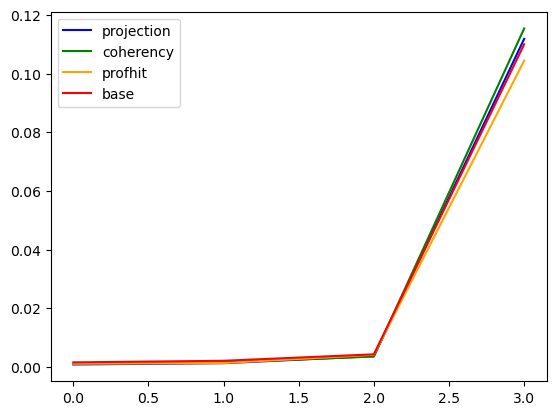

In [170]:
GET = "MSE"
plt.plot(get_mean(projection_results, names)[GET], label='projection', color='blue')
plt.plot(get_mean(coherency_results, names)[GET], label='coherency', color='green')
plt.plot(get_mean(profhit_results, names)[GET], label='profhit', color='orange')
plt.plot(get_mean(base_results, names)[GET], label='base', color='red')
plt.legend()
# plt.ylim(0,0.001)

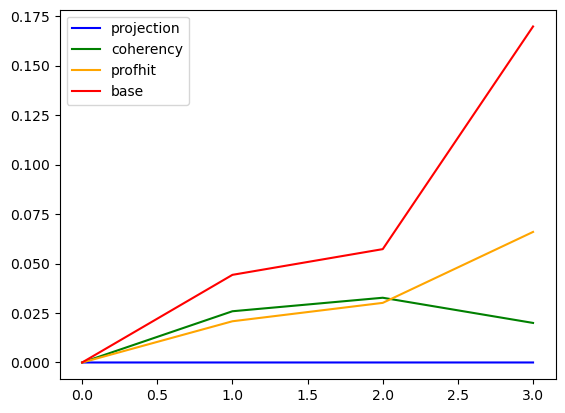

In [171]:
GET = "Coherency"
plt.plot(get_mean(projection_results, names)[GET], label='projection', color='blue')
plt.plot(get_mean(coherency_results, names)[GET], label='coherency', color='green')
plt.plot(get_mean(profhit_results, names)[GET], label='profhit', color='orange')
plt.plot(get_mean(base_results, names)[GET], label='base', color='red')
plt.legend()

In [172]:
print(names)
GET = 1
mean_values = [base_results[:,:,GET].mean(axis=0), coherency_results[:,:,GET].mean(axis=0), profhit_results[:,:,GET].mean(axis=0), projection_results[:,:,GET].mean(axis=0)]
GET = 2
mean_values_wmape = [base_results[:,:,GET].mean(axis=0), coherency_results[:,:,GET].mean(axis=0), profhit_results[:,:,GET].mean(axis=0), projection_results[:,:,GET].mean(axis=0)]
names_ = ['Base', 'Network Coherency', 'PROFHiT', "Projection"]

latex_table = r"""
\begin{tabular}{|c|c|c|c|c|}
\toprule
Model & \multicolumn{4}{c}{{Hierarchy level}} \\
 & 4 & 3 & 2 & 1 \\ 
\midrule
""" + "\n".join(
    [f"{names_[i]} & {mean_values[i][0]:.4f} / {mean_values_wmape[i][0]:.4f} & {mean_values[i][1]:.4f} / {mean_values_wmape[i][1]:.4f} & {mean_values[i][2]:.4f} / {mean_values_wmape[i][2]:.4f} & {mean_values[i][3]:.4f} / {mean_values_wmape[i][3]:.4f} \\\\ "
     for i in range(len(mean_values))]
) + r"""
\bottomrule
\end{tabular}
"""
print(latex_table)

Index(['Coherency', 'MSE', 'WMAPE'], dtype='object')

\begin{tabular}{|c|c|c|c|c|}
\toprule
Model & \multicolumn{4}{c}{{Hierarchy level}} \\
 & 4 & 3 & 2 & 1 \\ 
\midrule
Base & 0.0015 / 0.9812 & 0.0021 / 0.5960 & 0.0043 / 0.4310 & 0.1100 / 0.3352 \\ 
Network Coherency & 0.0010 / 0.8053 & 0.0016 / 0.5163 & 0.0035 / 0.3682 & 0.1154 / 0.3360 \\ 
PROFHiT & 0.0011 / 0.8721 & 0.0013 / 0.4719 & 0.0041 / 0.4502 & 0.1044 / 0.3320 \\ 
Projection & 0.0008 / 0.7296 & 0.0013 / 0.4596 & 0.0037 / 0.3823 & 0.1118 / 0.3349 \\ 
\bottomrule
\end{tabular}



In [173]:
print("Coherency")
get = 0
base_results[:,1:,get].mean(), coherency_results[:,1:,get].mean(), profhit_results[:,1:,get].mean(), projection_results[:,1:,get].mean()

Coherency


(0.0904526799917221,
 0.026194293051958084,
 0.03897463778654734,
 3.7094185122062604e-07)

In [174]:
print("WMAPE")
get = 2
base_results[:,1:,get].mean(), coherency_results[:,1:,get].mean(), profhit_results[:,1:,get].mean(), projection_results[:,1:,get].mean()

WMAPE


(0.4540477325518926,
 0.40683285395304364,
 0.4180195828278859,
 0.3922738581895828)

In [131]:
# print("WMAPE")
# get = 2
# base_results[:,1:,get].std(), coherency_results[:,1:,get].std(), profhit_results[:,1:,get].std(), projection_results[:,1:,get].std()

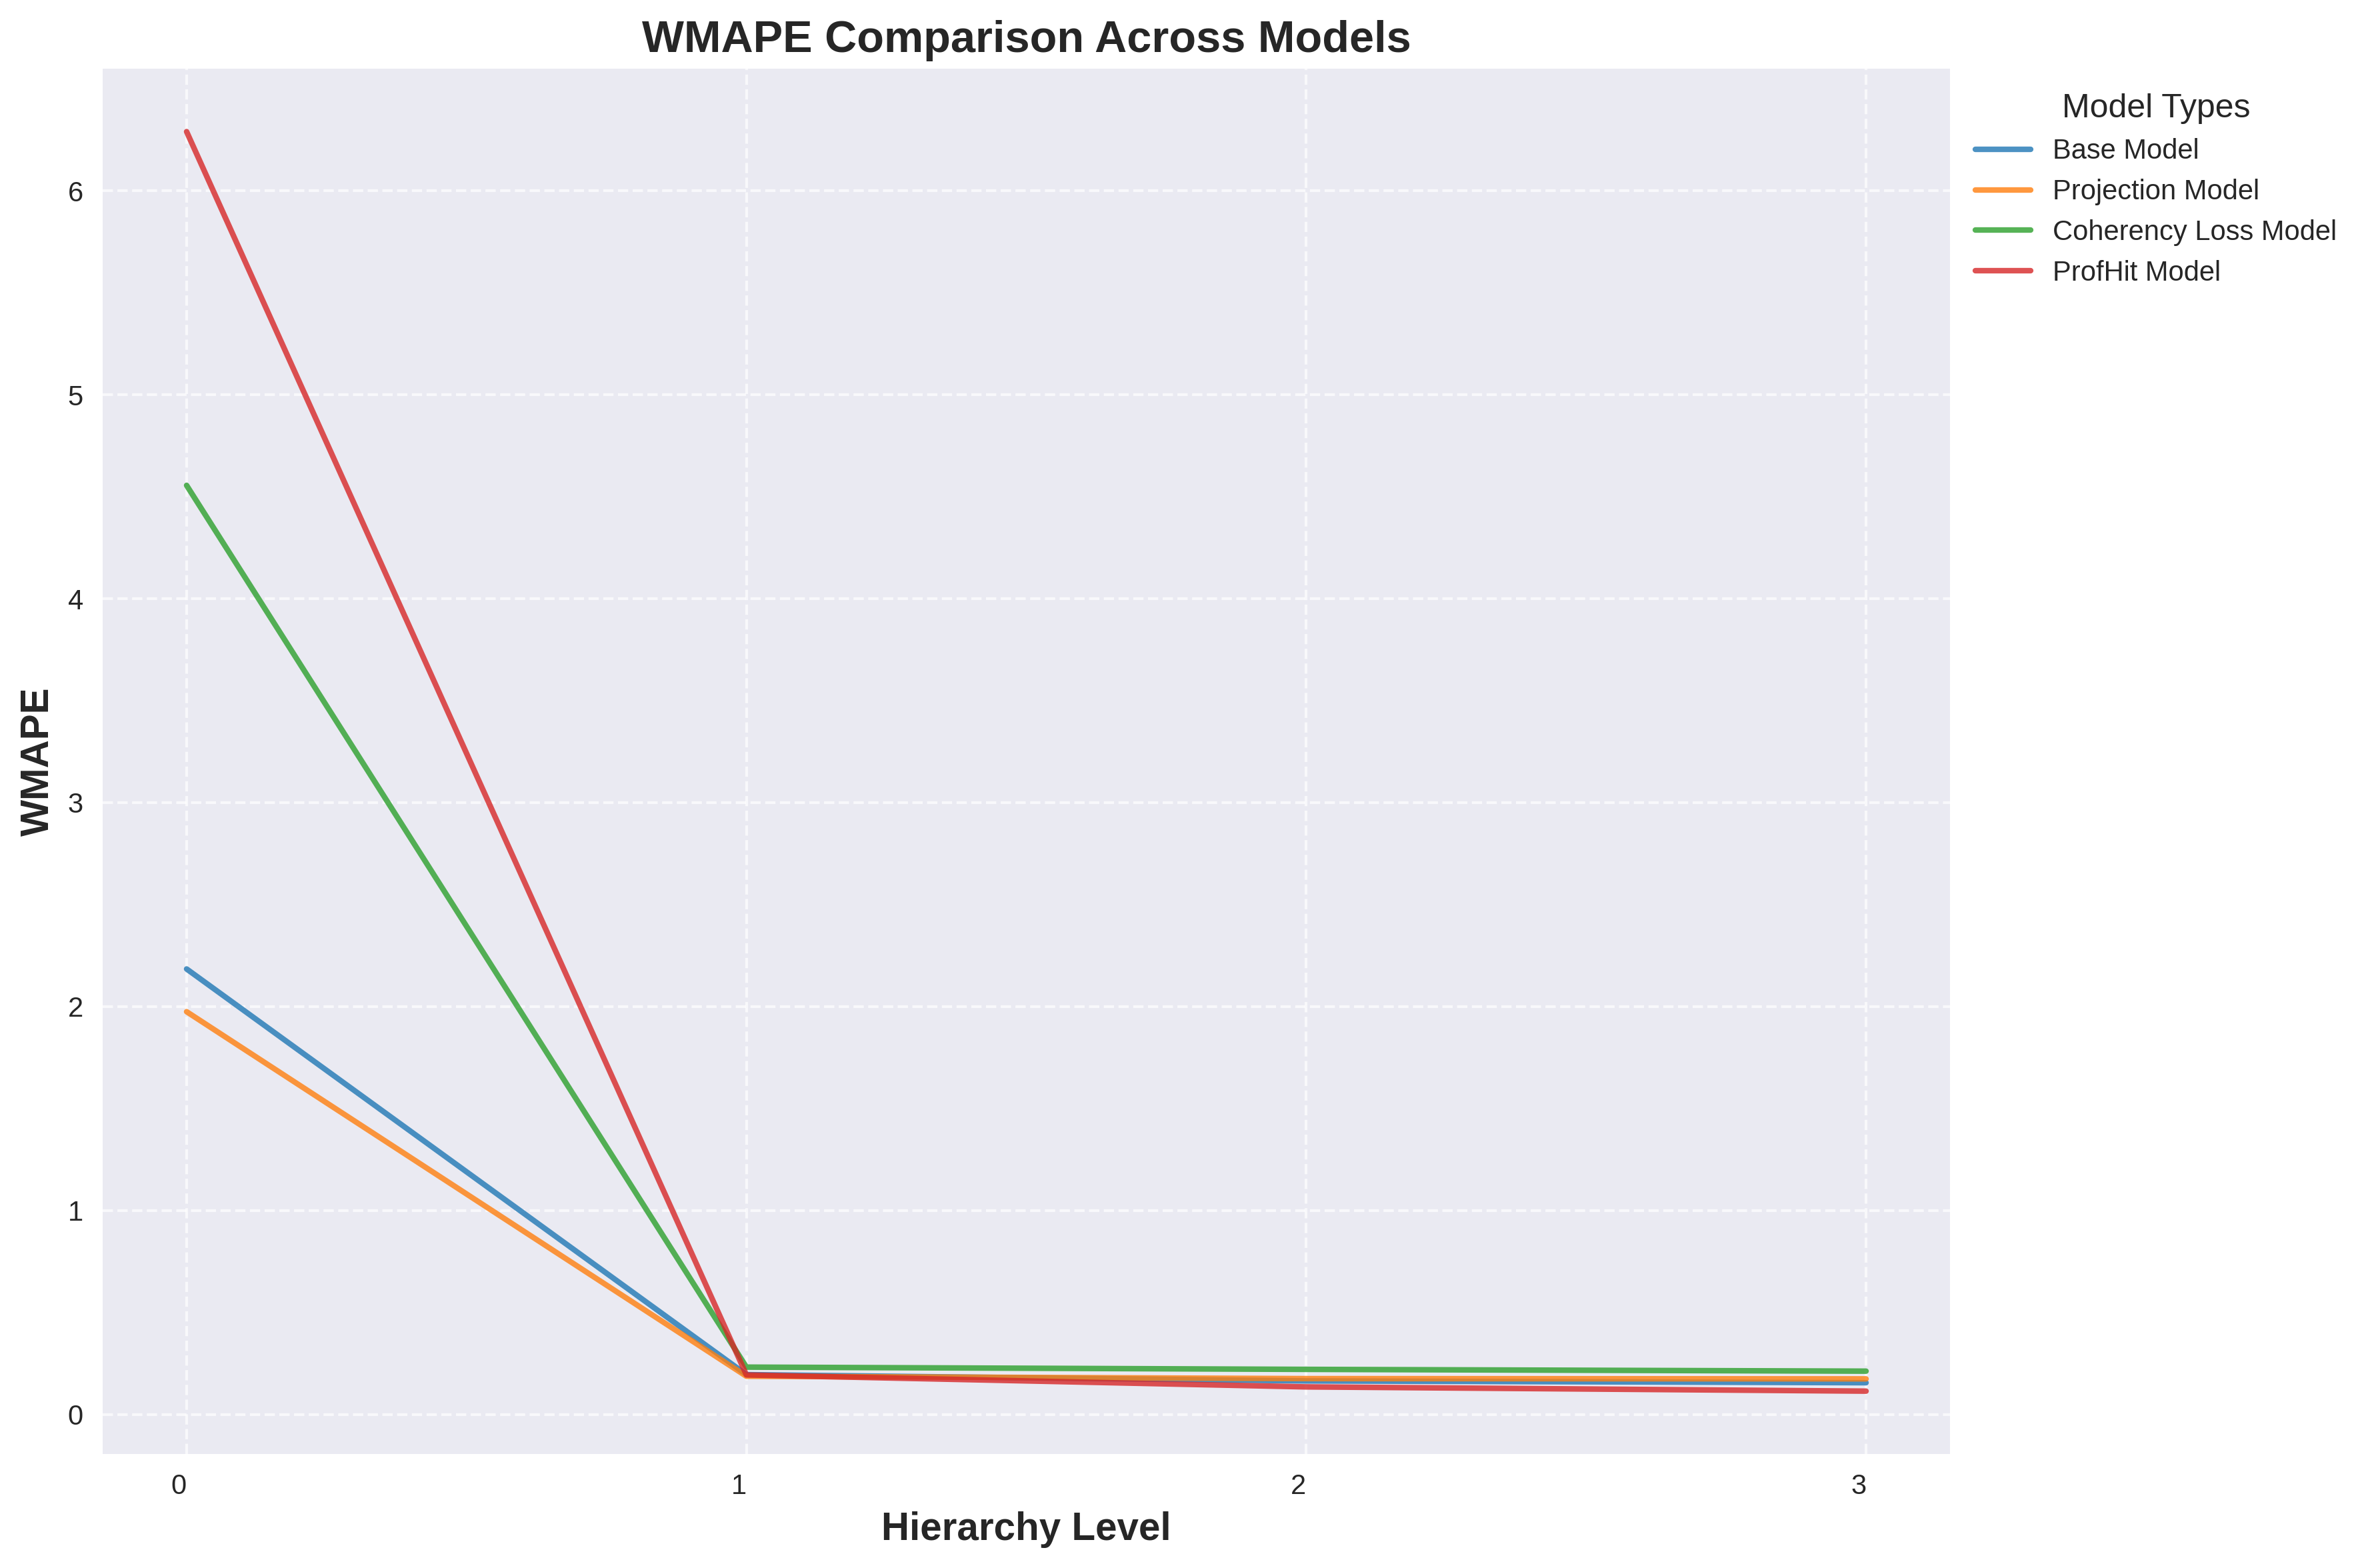

In [14]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.ticker as ticker

# Set up custom color cycle
colors = list(mcolors.TABLEAU_COLORS.values())

# Customize the plot style
plt.style.use('seaborn-v0_8')
plt.rcParams.update({
    'font.size': 12,
    'axes.labelsize': 14,
    'axes.titlesize': 16,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 12,
    'figure.titlesize': 18
})

# Create a larger figure with higher DPI
fig, ax = plt.subplots(figsize=(12, 8), dpi=300)

# Plot the results for each model
get = "WMAPE"
models = [
    (base_results, "Base Model"),
    (projection_results, "Projection Model"),
    (coherency_results, "Coherency Loss Model"),
    (profhit_results, "ProfHit Model"),
]

for i, (results, label) in enumerate(models):
    mean_res = get_mean(results, names)
    std_res = get_std(results, names)
    # plt.errorbar(range(mean_res.shape[0]), mean_res[get], std_res[get], label=label, color=colors[i], linewidth=2, alpha=0.8)
    plt.plot(range(mean_res.shape[0]), mean_res[get], label=label, color=colors[i], linewidth=2, alpha=0.8)
    # plot_results(results, names, get, label)#, color=colors[i], linewidth=2, alpha=0.8)
    # ax.fill_between(names, mean_res[get], alpha=0.1, color=colors[i])

# Customize the plot
ax.set_title("WMAPE Comparison Across Models", fontweight='bold')
ax.set_xlabel("Hierarchy Level", fontweight='bold')
ax.set_ylabel("WMAPE", fontweight='bold')
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend(title="Model Types", title_fontsize=12, fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))

# Rotate x-axis labels for better readability
plt.xticks(rotation=0, ha='right')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax = plt.gca()  # Get the current axis
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig(f'results/{dataset}_wmape.png', bbox_inches='tight')

plt.show()


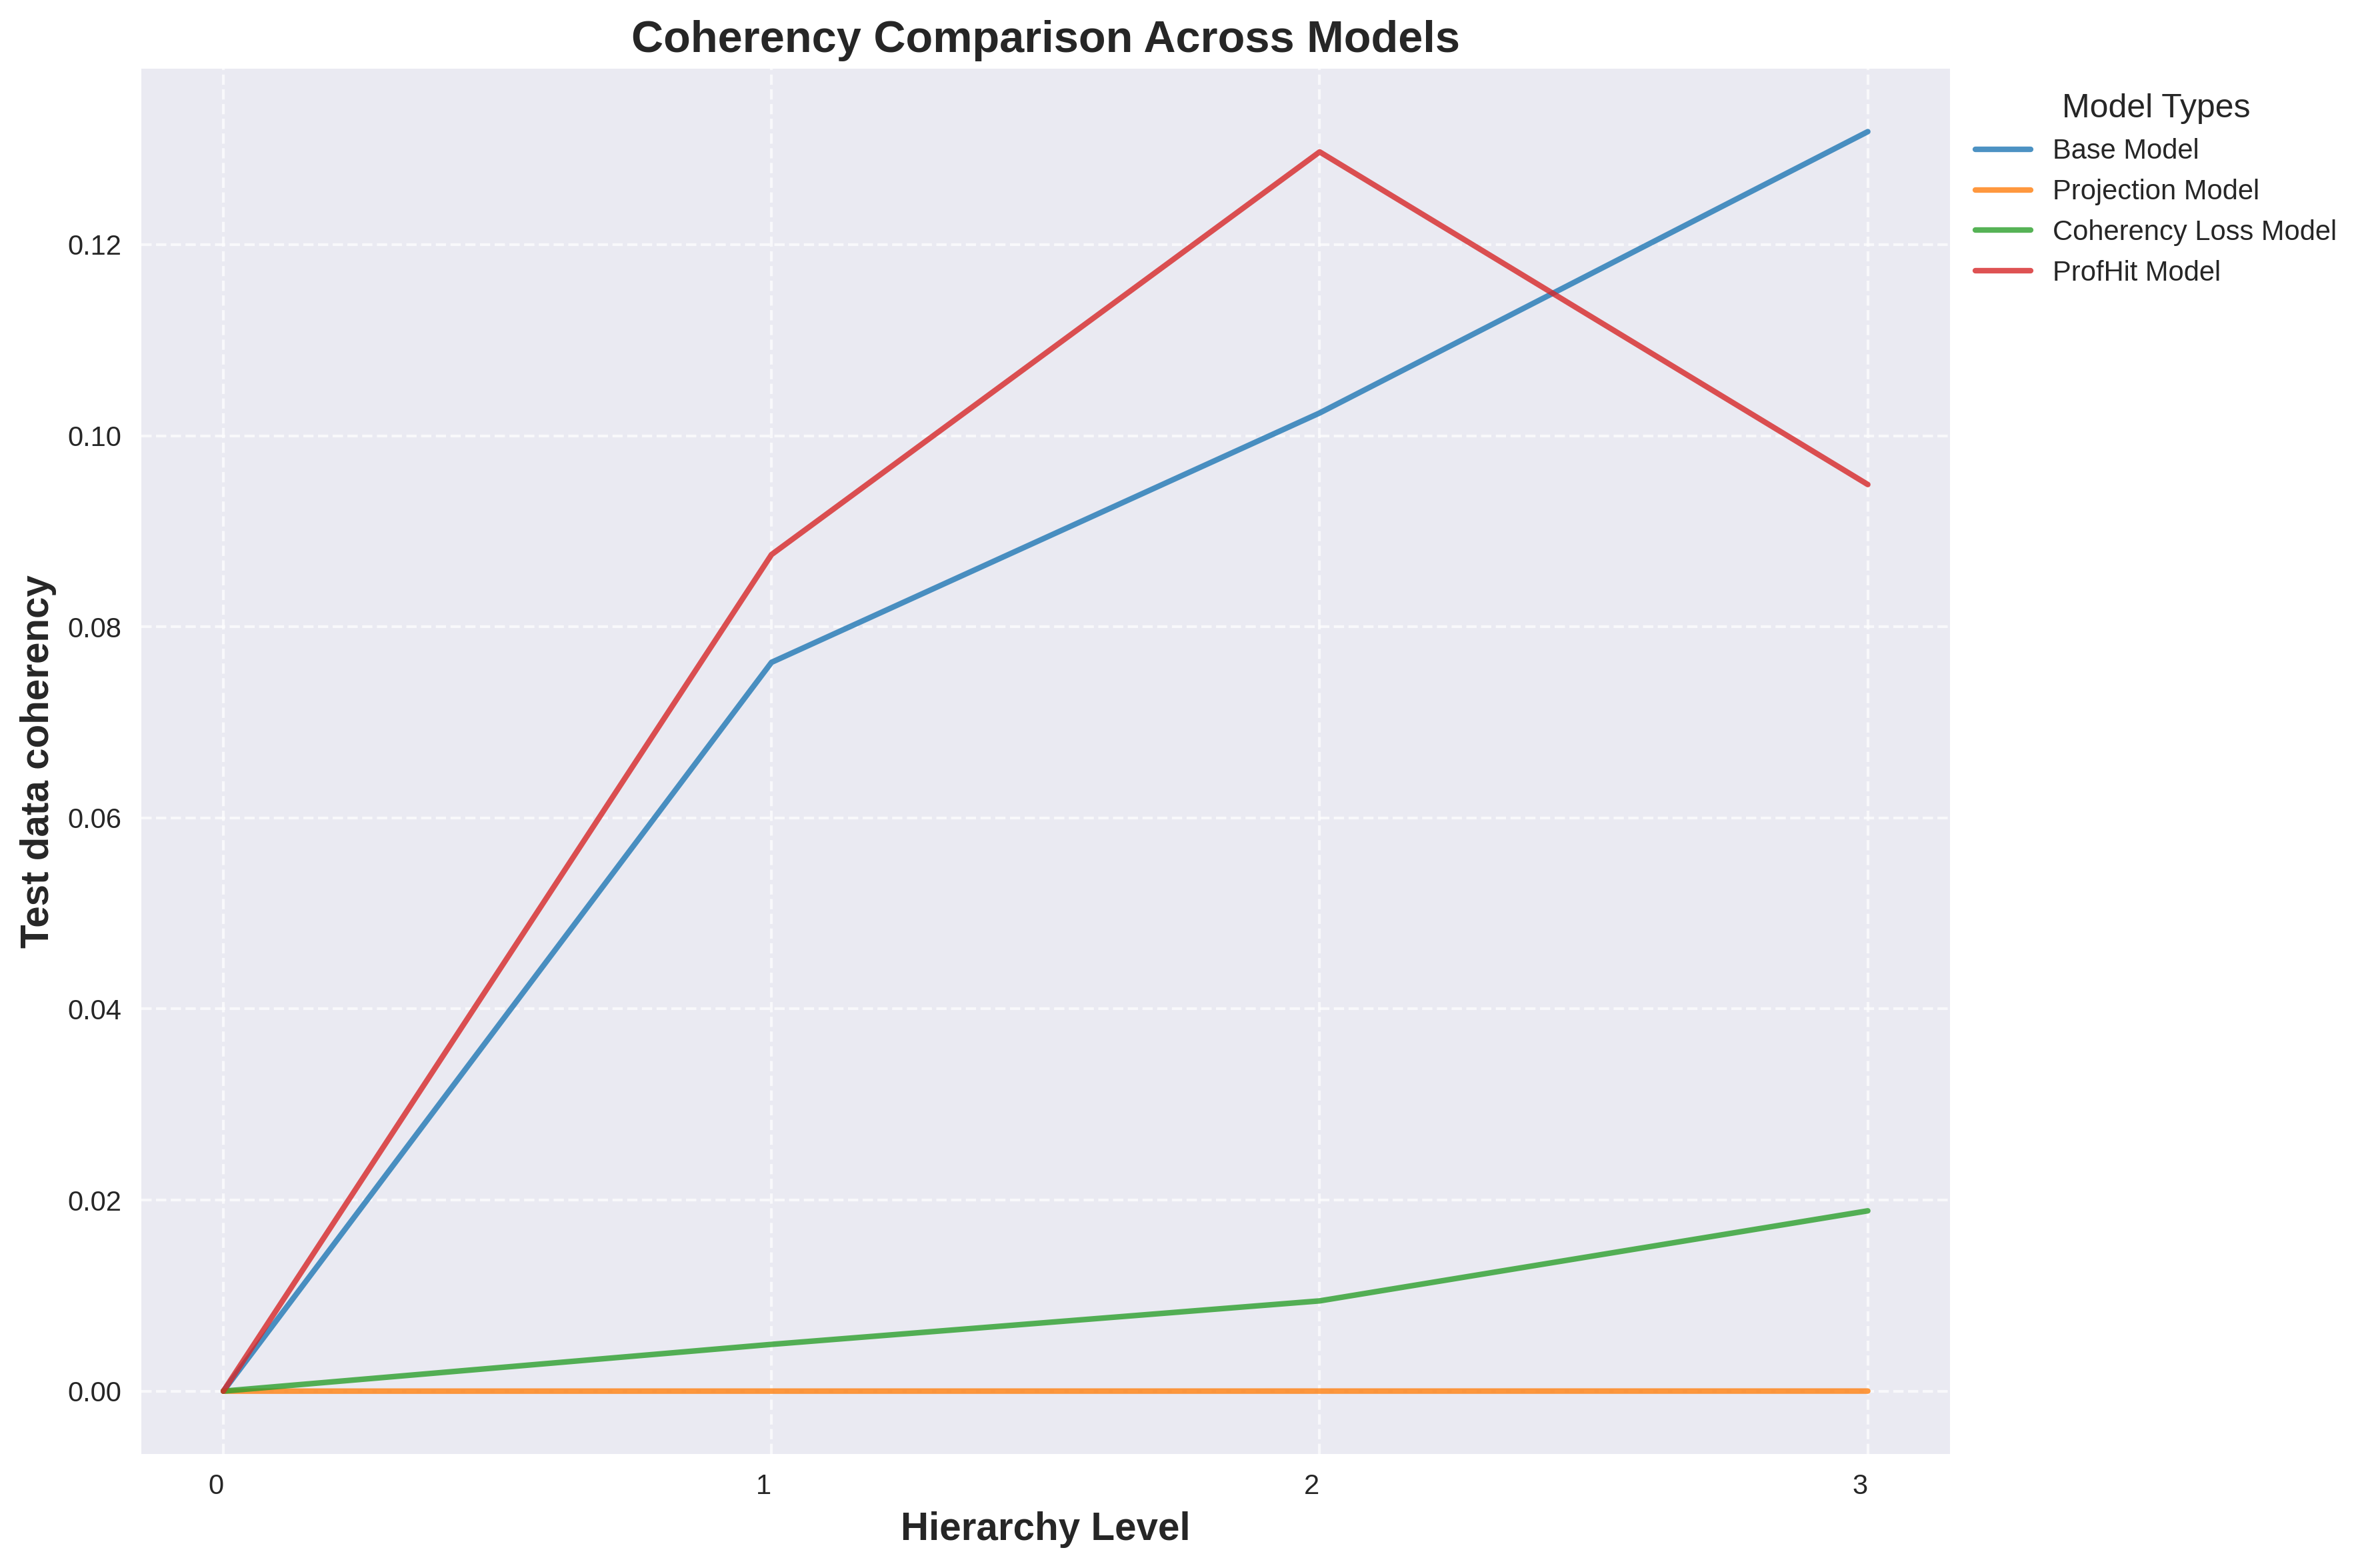

In [15]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Set up custom color cycle
colors = list(mcolors.TABLEAU_COLORS.values())

# Customize the plot style
plt.style.use('seaborn-v0_8')
plt.rcParams.update({
    'font.size': 12,
    'axes.labelsize': 14,
    'axes.titlesize': 16,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 12,
    'figure.titlesize': 18
})

# Create a larger figure with higher DPI
fig, ax = plt.subplots(figsize=(12, 8), dpi=300)

# Plot the results for each model
get = "Coherency"
models = [
    (base_results, "Base Model"),
    (projection_results, "Projection Model"),
    (coherency_results, "Coherency Loss Model"),
    (profhit_results, "ProfHit Model"),
]

for i, (results, label) in enumerate(models):
    mean_res = get_mean(results, names)
    plt.plot(range(mean_res.shape[0]), mean_res[get], label=label, color=colors[i], linewidth=2, alpha=0.8)

# Customize the plot
ax.set_title("Coherency Comparison Across Models", fontweight='bold')
ax.set_xlabel("Hierarchy Level", fontweight='bold')
ax.set_ylabel("Test data coherency", fontweight='bold')
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend(title="Model Types", title_fontsize=12, fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))

# Rotate x-axis labels for better readability
plt.xticks(rotation=0, ha='right')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax = plt.gca()  # Get the current axis
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig(f'results/{dataset}_coherency.png', bbox_inches='tight')

# Show the plot (optional)
plt.show()


In [16]:
full_agg = format_aggregation_matrix(base_agg_mat).float().to(device)
subtree_size = full_agg.sum(dim=1)
sizes = torch.unique(subtree_size)
weights = sizes.cpu().numpy()[::-1]

In [17]:
get_mean(base_results, names)["WMAPE"] @ weights / weights.sum()

1.3243862861257971

In [18]:
get_mean(projection_results, names)["WMAPE"] @ weights / weights.sum()

1.2044132692275031

In [19]:
get_mean(coherency_results, names)["WMAPE"] @ weights / weights.sum()

2.6940979849801874

In [20]:
get_mean(profhit_results, names)["WMAPE"] @ weights / weights.sum()

3.6588596300139726